In [0]:
import keras
from keras.datasets import mnist
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.compat.v1.keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
# Carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [0]:
# Quantas imagens eu tenho para treino?
print(len(x_treino)) # 60000

# Quantas imagens eu tenho para teste?
print(len(x_teste)) # 10000

primeira_imagem = x_treino[0]
representacao_primeira_imagem = y_treino[0]

# Qual é o formato da primeira imagem?
print(primeira_imagem.shape) # (28, 28) - 28 pixels vs 28 pixels

# O que tem na primeira imagem?
print(representacao_primeira_imagem) # Representa um 5

# Quais são os dados dessa primeira imagem?
print(primeira_imagem)

60000
10000
(28, 28)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253

Essa imagem representa: 8


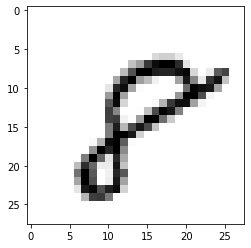

In [0]:
# Exibindo a imagem

import matplotlib.pyplot as plt

indice = 59999

print("Essa imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [0]:
# Achatando as matrizes de pixels e transformando em uma única lista com valores

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # Irá trazer (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 794

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [0]:
print("Novo formato dos dados:", x_treino[0].shape)
print(x_treino[0])

Novo formato dos dados: (784,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198

In [0]:
# Normalização dos dados

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

In [0]:
# Visualizando dados normalizados

print("Dados normalizados", x_treino[0])

Dados normalizados [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [0]:
valores_unicos = set(y_treino)
qtde_valores_unicos = len(valores_unicos)

print(valores_unicos)
print(qtde_valores_unicos)

# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] - Representação da camada de saída
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] - Representa o número 0 na camada de saída
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] - Representa o número 9 na camada de saída
# [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] - Representa o número 3 na camada de saída

y_treino = keras.utils.to_categorical(y_treino, qtde_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, qtde_valores_unicos)

# O que temos em y_treino[0] depois?
print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# Criando o modelo da rede neural

model = Sequential()

# Primeira hidden layer com 30 neurônios e função de ativação ReLU
# Na primeira camada, precisamos informar o input_shape, que no caso (784,)
model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador. No caso, será o Dropout
model.add(Dropout(0.2))

# Segunda hidden layer com 20 neurônios e função de ativação ReLU
model.add(Dense(20, activation='relu'))

# Mais um regularizador após a segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de output, informando a quantidade de valores únicos, que no caso é 10
model.add(Dense(qtde_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compila o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [0]:
# Treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8730 - accuracy: 0.7311 - val_loss: 0.3072 - val_accuracy: 0.9128
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4680 - accuracy: 0.8608 - val_loss: 0.2469 - val_accuracy: 0.9277
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3962 - accuracy: 0.8840 - val_loss: 0.2163 - val_accuracy: 0.9349
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3587 - accuracy: 0.8962 - val_loss: 0.1997 - val_accuracy: 0.9404
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.9023 - val_loss: 0.1917 - val_accuracy: 0.9420
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3179 - accuracy: 0.9078 - val_loss: 0.1812 - val_accuracy: 0.9453
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.9116 - val_loss: 0.1766 - val_accuracy: 0.9472
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão: [[2.2827942e-06 3.6438826e-06 2.5804277e-04 2.7497796e-07 9.5243158e-04
  1.9786542e-04 9.9812692e-01 2.6739906e-06 4.5517291e-04 6.5609180e-07]]
Previsão (ajustada): [6]


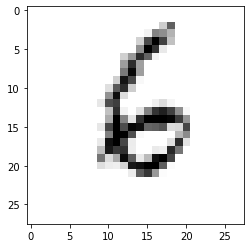

In [0]:
# Fazendo nossas previsões

indice = 2000

# Qual é o valor categórico em y_teste[indice]?
print("Valor categórico em y_teste[indice]:", y_teste[indice])

# Se for um 0, irá exibir [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# print(x_teste[indice])

imagem = x_teste[indice].reshape((1, resolucao_total))

# Fazendo minha previsão

prediction = model.predict(imagem)
print("Previsão:", prediction)

# Ajustando a previsão para o número real
prediction_class = model.predict_classes(imagem)
print("Previsão (ajustada):", prediction_class)

(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)